# Case Study

In [1]:
import matplotlib.pyplot as plt

import andes
import ams

In [2]:
%matplotlib inline

In [3]:
andes.config_logger(stream_level=30)
ams.config_logger(stream_level=40)

In [4]:
!andes misc --version

Python  3.12.0
andes   1.9.3.post46+g0183fc24
numpy   2.0.2
kvxopt  1.3.2.1
sympy   1.13.3
scipy   1.13.1
pandas  2.2.2
numba   0.60.0


In this study, we use the same OPF case cause the only difference is the `StaticGen.genfuel` and it will not impact the OPF results.

The four dynamic cases are:
1. ``IL200_dyn_20wt.xlsx``, 20% wind penetration with IEEEG1
2. ``IL200_dyn_20wt_ts.xlsx``, 20% wind penetration with IEEEG1 replaced by IEEEG1TS
3. ``IL200_dyn_50wt.xlsx``, 50% wind penetration with IEEEG1
4. ``IL200_dyn_50wt_ts.xlsx``, 50% wind penetration with IEEEG1 replaced by IEEEG1TS

In [ ]:
opf_case = './ACTIVSg200/IL200_opf.xlsx'
sp1 = ams.load(opf_case,
               setup=True, no_output=True,
               default_config=True)
sp2 = ams.load(opf_case,
               setup=True, no_output=True,
               default_config=True)
sp3 = ams.load(opf_case,
               setup=True, no_output=True,
               default_config=True)
sp4 = ams.load(opf_case,
               setup=True, no_output=True,
               default_config=True)

dy_cases = ['./ACTIVSg200/1.IL200_dyn_20wt.xlsx',
            './ACTIVSg200/2.IL200_dyn_20wt_ts.xlsx',
            './ACTIVSg200/3.IL200_dyn_50wt.xlsx',
            './ACTIVSg200/4.IL200_dyn_50wt_ts.xlsx']

s1 = sp1.to_andes(addfile=dy_cases[0],
                  setup=False, no_output=True,
                  default_config=True)
s2 = sp2.to_andes(addfile=dy_cases[1],
                  setup=False, no_output=True,
                  default_config=True)
s3 = sp3.to_andes(addfile=dy_cases[2],
                  setup=False, no_output=True,
                  default_config=True)
s4 = sp4.to_andes(addfile=dy_cases[3],
                  setup=False, no_output=True,
                  default_config=True)

for ss in [s1, s2, s3, s4]:
    # add a Alter device to set load increase
    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_1', src='Ppf',
                           attr='v', method='+', amount=0.2))
    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_2', src='Ppf',
                           attr='v', method='+', amount=0.15))
    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_3', src='Ppf',
                           attr='v', method='+', amount=0.1))

    ss.setup()

In [6]:
for ss in [sp1, sp2, sp3, sp4]:
    ss.DCOPF.run(solver='CLARABEL')
    ss.DCOPF.dc2ac()

In [7]:
sp1.dyn.send(adsys=s1, routine='DCOPF')
sp2.dyn.send(adsys=s2, routine='DCOPF')
sp3.dyn.send(adsys=s3, routine='DCOPF')
sp4.dyn.send(adsys=s4, routine='DCOPF')

True

In [8]:
for ss in [s1, s2, s3, s4]:
    # Constant load
    ss.PQ.config.p2p = 1
    ss.PQ.config.q2q = 1
    ss.PQ.config.p2z = 0
    ss.PQ.config.q2z = 0

    ss.PFlow.run()

    _ = ss.TDS.init()

GENROU (vf range) out of typical lower limit.

   idx     | values | limit
-----------+--------+------
 GENROU_6  | 0      | 1    
 GENROU_16 | 0      | 1    
 GENROU_17 | 0      | 1    
 GENROU_20 | 0      | 1    
 GENROU_22 | 0      | 1    
 GENROU_23 | 0      | 1    
 GENROU_24 | 0      | 1    
 GENROU_25 | 0      | 1    
 GENROU_31 | 0      | 1    
 GENROU_37 | 0      | 1    
 GENROU_38 | 0      | 1    
 GENROU_39 | 0      | 1    
 GENROU_40 | 0      | 1    
 GENROU_42 | 0      | 1    
 GENROU_43 | 0      | 1    
 GENROU_48 | 0      | 1    
 GENROU_49 | 0      | 1    


GENROU (vf range) out of typical lower limit.

   idx     | values | limit
-----------+--------+------
 GENROU_6  | 0      | 1    
 GENROU_16 | 0      | 1    
 GENROU_17 | 0      | 1    
 GENROU_20 | 0      | 1    
 GENROU_22 | 0      | 1    
 GENROU_23 | 0      | 1    
 GENROU_24 | 0      | 1    
 GENROU_25 | 0      | 1    
 GENROU_31 | 0      | 1    
 GENROU_37 | 0      | 1    
 GENROU_38 | 0      | 1    
 GENROU_

In [9]:
for ss in [s1, s2, s3, s4]:

    ss.TDS.config.tf = 50
    ss.TDS.config.criteria = 0
    ss.TDS.config.no_tqdm = True

    ss.TDS.run()

<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.2739 at t=1. Previous value was 0.0739.
<Alter Alter_2>: set PQ.PQ_2.Ppf.v=0.167 at t=1. Previous value was 0.017.
<Alter Alter_3>: set PQ.PQ_3.Ppf.v=0.1795 at t=1. Previous value was 0.0795.
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.2739 at t=1. Previous value was 0.0739.
<Alter Alter_2>: set PQ.PQ_2.Ppf.v=0.167 at t=1. Previous value was 0.017.
<Alter Alter_3>: set PQ.PQ_3.Ppf.v=0.1795 at t=1. Previous value was 0.0795.
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.2739 at t=1. Previous value was 0.0739.
<Alter Alter_2>: set PQ.PQ_2.Ppf.v=0.167 at t=1. Previous value was 0.017.
<Alter Alter_3>: set PQ.PQ_3.Ppf.v=0.1795 at t=1. Previous value was 0.0795.
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.2739 at t=1. Previous value was 0.0739.
<Alter Alter_2>: set PQ.PQ_2.Ppf.v=0.167 at t=1. Previous value was 0.017.
<Alter Alter_3>: set PQ.PQ_3.Ppf.v=0.1795 at t=1. Previous value was 0.0795.


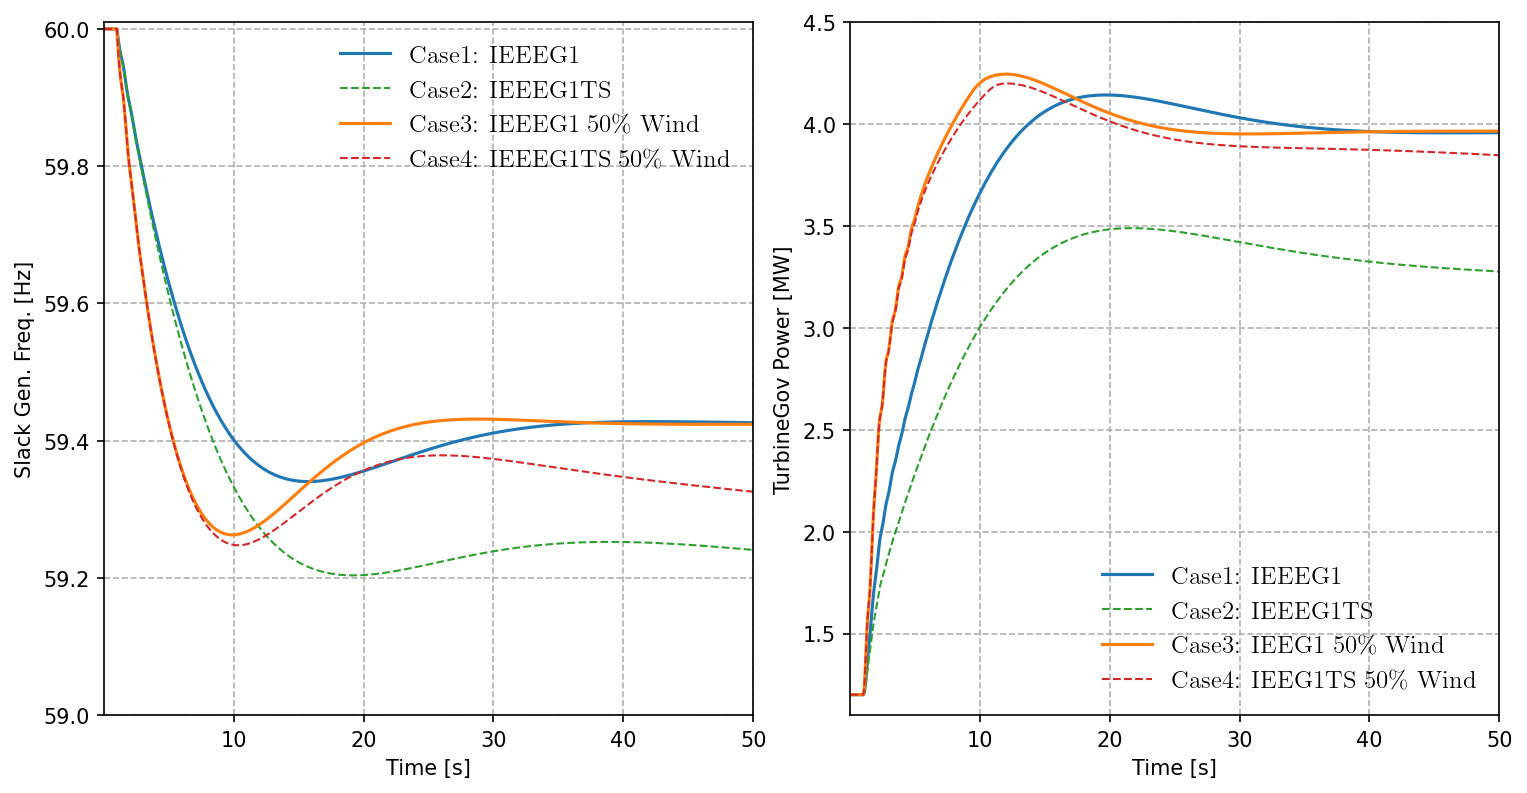

In [10]:
plt.style.use('default')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=150)
plt.subplots_adjust(wspace=0.15)

fmin, fmax = 59, 60.01
a = (46,)
_ = s1.TDS.plt.plot(s1.GENROU.omega,
                    a=a,
                    ymin=fmin, ymax=fmax,
                    ytimes=s1.config.freq,
                    show=False, grid=True,
                    line_width=1.5,
                    ylabel='Slack Gen. Freq. [Hz]',
                    yheader=['Case1: IEEEG1'],
                    fig=fig, ax=ax[0])
_ = s2.TDS.plt.plot(s2.GENROU.omega,
                    a=a,
                    ytimes=s2.config.freq,
                    # hline=[59.527],
                    show=False,
                    yheader=['Case2: IEEEG1TS'],
                    linestyles=['--'],
                    color=['tab:green'],
                    fig=fig, ax=ax[0],)
_ = s3.TDS.plt.plot(s3.GENROU.omega,
                    a=a,
                    ytimes=s3.config.freq,
                    show=False,
                    line_width=1.5,
                    yheader=[r'Case3: IEEEG1 50\% Wind'],
                    fig=fig, ax=ax[0],)
_ = s4.TDS.plt.plot(s4.GENROU.omega,
                    a=a,
                    ytimes=s4.config.freq,
                    show=False, grid=True,
                    yheader=[r'Case4: IEEEG1TS 50\% Wind'],
                    color=['tab:red'],
                    linestyles=['--'],
                    fig=fig, ax=ax[0],)

a = (0,)
tmin, tmax = 1.1, 4.5
_ = s1.TDS.plt.plot(s1.IEEEG1.pout,
                    a=a,
                    ytimes=s1.config.mva,
                    ymin=tmin, ymax=tmax,
                    show=False, grid=True,
                    ylabel='TurbineGov Power [MW]',
                    line_width=1.5,
                    yheader=['Case1: IEEEG1'],
                    fig=fig, ax=ax[1],)
_ = s2.TDS.plt.plot(s2.IEEEG1TS.pout,
                    a=a,
                    ytimes=s2.config.mva,
                    show=False,
                    yheader=['Case2: IEEEG1TS'],
                    linestyles=['--'],
                    color=['tab:green'],
                    fig=fig, ax=ax[1],)
_ = s3.TDS.plt.plot(s3.IEEEG1.pout,
                    a=a,
                    ytimes=s2.config.mva,
                    show=False,
                    line_width=1.5,
                    yheader=[r'Case3: IEEG1 50\% Wind'],
                    fig=fig, ax=ax[1],)
_ = s4.TDS.plt.plot(s4.IEEEG1TS.pout,
                    a=a,
                    ytimes=s2.config.mva,
                    show=False,
                    yheader=[r'Case4: IEEG1TS 50\% Wind'],
                    color=['tab:red'],
                    linestyles=['--'],
                    fig=fig, ax=ax[1],)

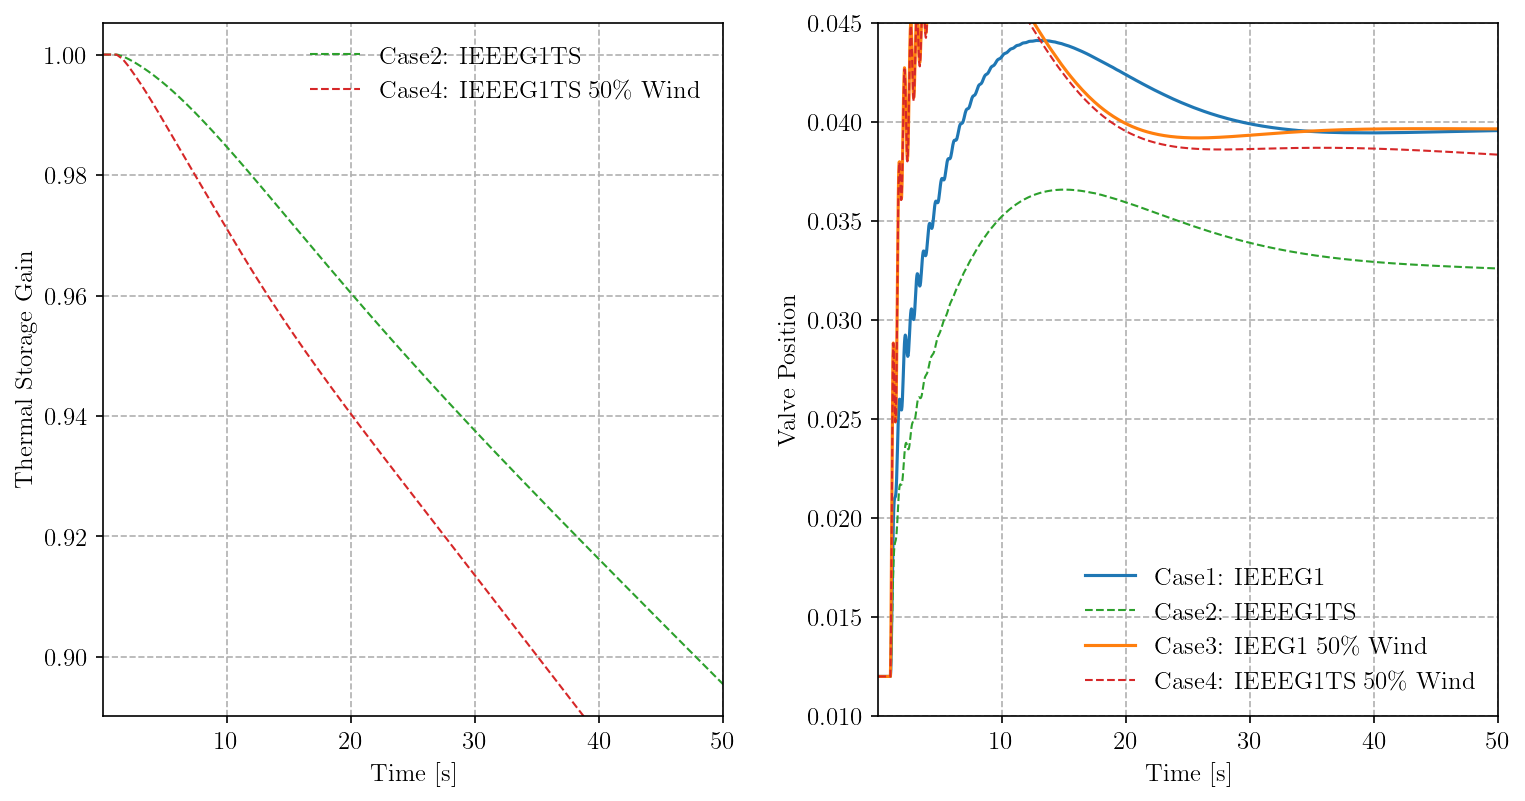

In [11]:
fig1, ax1 = plt.subplots(1, 2, figsize=(12, 6), dpi=150)
plt.subplots_adjust(wspace=0.25)

a = (0,)
_ = s2.TDS.plt.plot(s2.IEEEG1TS.TS.y,
                    a=a,
                    ycalc=lambda x: 1 - x,
                    show=False, grid=True,
                    ylabel='Thermal Storage Gain',
                    yheader=['Case2: IEEEG1TS'],
                    linestyles=['--'],
                    color=['tab:green'],
                    style='default',
                    fig=fig1, ax=ax1[0])
_ = s4.TDS.plt.plot(s4.IEEEG1TS.TS.y,
                    a=a,
                    ycalc=lambda x: 1 - x,
                    show=False,
                    yheader=[r'Case4: IEEEG1TS 50\% Wind'],
                    color=['tab:red'],
                    linestyles=['--'],
                    fig=fig1, ax=ax1[0])

a = (0,)
_ = s1.TDS.plt.plot(s1.IEEEG1.GV,
                    a=a,
                    show=False, grid=True,
                    ymin=0.01, ymax=0.045,
                    line_width=1.5,
                    ylabel='Valve Position',
                    yheader=['Case1: IEEEG1'],
                    fig=fig1, ax=ax1[1])
_ = s2.TDS.plt.plot(s2.IEEEG1TS.GV,
                    a=a,
                    show=False, grid=True,
                    yheader=['Case2: IEEEG1TS'],
                    linestyles=['--'],
                    color=['tab:green'],
                    style='default',
                    fig=fig1, ax=ax1[1])
_ = s3.TDS.plt.plot(s3.IEEEG1.GV,
                    a=a,
                    show=False,
                    line_width=1.5,
                    yheader=[r'Case3: IEEG1 50\% Wind'],
                    fig=fig1, ax=ax1[1])
_ = s4.TDS.plt.plot(s4.IEEEG1TS.GV,
                    a=a,
                    show=False,
                    yheader=[r'Case4: IEEEG1TS 50\% Wind'],
                    color=['tab:red'],
                    linestyles=['--'],
                    fig=fig1, ax=ax1[1])